In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/ai_project/data/f10-7.pkl', 'rb') as f:
    df = pickle.load(f)

In [ ]:
df.head()

,Date,value
44,19470305,306.10
45,19470306,306.00
46,19470307,321.40
47,19470308,345.60
48,19470309,335.75


In [ ]:
recent = df[df['Date'] > 20100101]

In [ ]:
len(recent)

3040

In [ ]:
X = [recent['value'].values[i:i+300] for i in range(len(recent)-300)]

In [ ]:
y = [recent['value'].values[i+300] for i in range(len(recent)-300)]

In [ ]:
len(X), len(y)

(2740, 2740)

In [ ]:
X_test, y_test = X[-100:], y[-100:]

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(np.array(X[:-100]), np.array(y[:-100]), test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2112, 300), (528, 300), (2112,), (528,))

In [ ]:
model1 = Sequential()
# model1.add(Dense(128, activation='relu', input_dim=X_train.shape[-1]))
model1.add(Dense(64, activation='relu', input_dim=X_train.shape[-1]))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(1))

model1.compile(loss='mse', optimizer='adam', metrics=['mae'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                19264     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 4)                 132       
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 21,481
Trainable params: 21,481
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model1.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    verbose=1)

Epoch 1/100
66/66 [==============================] - 1s 4ms/step - loss: 672.5402 - mae: 18.4746 - val_loss: 407.4069 - val_mae: 14.9101
Epoch 2/100
66/66 [==============================] - 0s 2ms/step - loss: 324.0069 - mae: 13.3694 - val_loss: 321.4062 - val_mae: 13.1303
Epoch 3/100
66/66 [==============================] - 0s 2ms/step - loss: 278.1414 - mae: 12.3048 - val_loss: 296.3596 - val_mae: 13.8009
Epoch 4/100
66/66 [==============================] - 0s 2ms/step - loss: 225.7029 - mae: 10.9395 - val_loss: 206.7576 - val_mae: 10.5923
Epoch 5/100
66/66 [==============================] - 0s 2ms/step - loss: 210.4104 - mae: 10.5496 - val_loss: 186.3699 - val_mae: 10.0308
Epoch 6/100
66/66 [==============================] - 0s 2ms/step - loss: 184.2876 - mae: 9.8014 - val_loss: 175.1314 - val_mae: 9.6755
Epoch 7/100
66/66 [==============================] - 0s 2ms/step - loss: 170.6361 - mae: 9.5461 - val_loss: 147.4182 - val_mae: 8.9419
Epoch 8/100
66/66 [==========================

In [ ]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

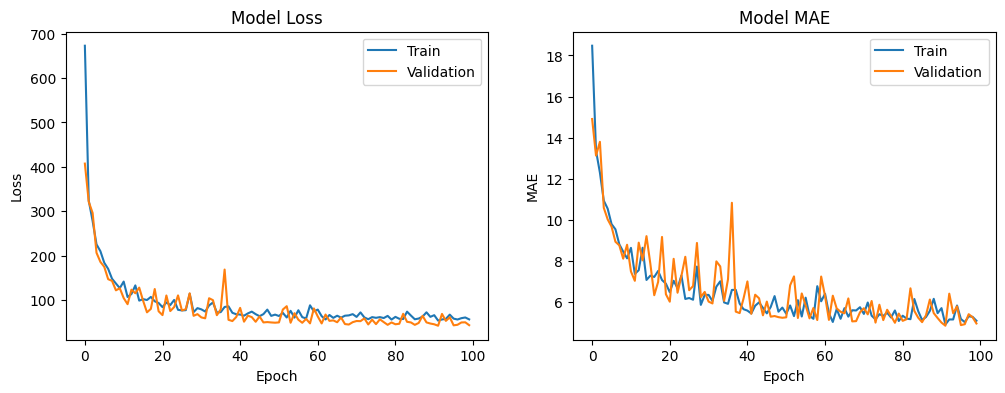

In [ ]:
plot_result(history1)

In [ ]:
def make_pred(num, model):
    data_pred = np.array(df['value'].values[:-100])
    for i in range(num):
        temp = data_pred[-300:]
        pred = model.predict(temp.reshape(1, -1))
        data_pred = np.append(data_pred, pred)
    return data_pred[-num:]

In [ ]:
pred1 = make_pred(100, model1)

1/1 [==============================] - 0s 18ms/step


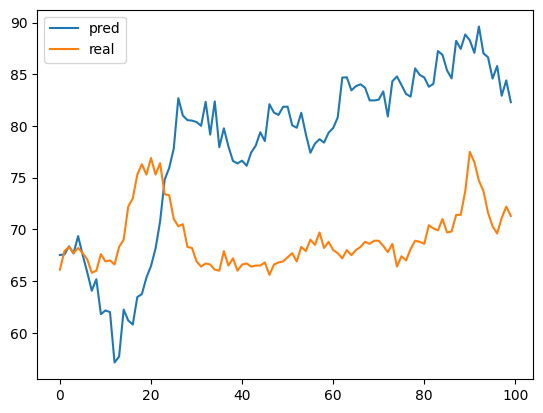

In [ ]:
plt.plot(pred1, label='pred')
plt.plot(y_test, label='real')
plt.legend()

In [ ]:
len(pred1)

100

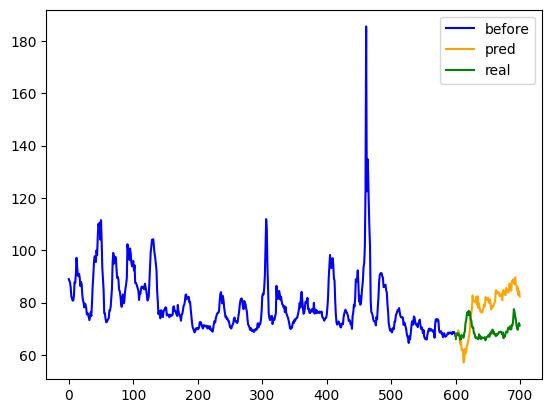

In [ ]:
plt.plot(recent['value'].values[-700:-100], label='before', color='blue')
plt.plot(range(600, 700), pred1, label='pred', color='orange')
plt.plot(range(600, 700), y_test, label='real', color='green')
plt.legend()